<a href="https://colab.research.google.com/github/hirofsgit/Python_1/blob/main/Chap8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 68.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=ad5b812d036df5eea19fd19071b05452c766b0dc8ed314a2577ebc4b793f844a
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
import copy
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.collections import LineCollection

# 図8.1

In [ ]:
kidney = pd.read_csv("/content/kidney.txt", delimiter=" ")

In [ ]:
model = smf.ols(formula="tot ~ age", data=kidney)
results = model.fit()

In [ ]:
subj55 = kidney.loc[kidney.age == 55]
subj55

,age,tot
130,55,-0.01


In [ ]:
X = sm.add_constant(kidney.age)

In [ ]:
model = sm.OLS(kidney.tot, X)
res = model.fit()

In [ ]:
yhat = res.predict(X)

In [ ]:
yhat55 = yhat[kidney.age == 55].iloc[0]
yhat55.round(2)

-1.46

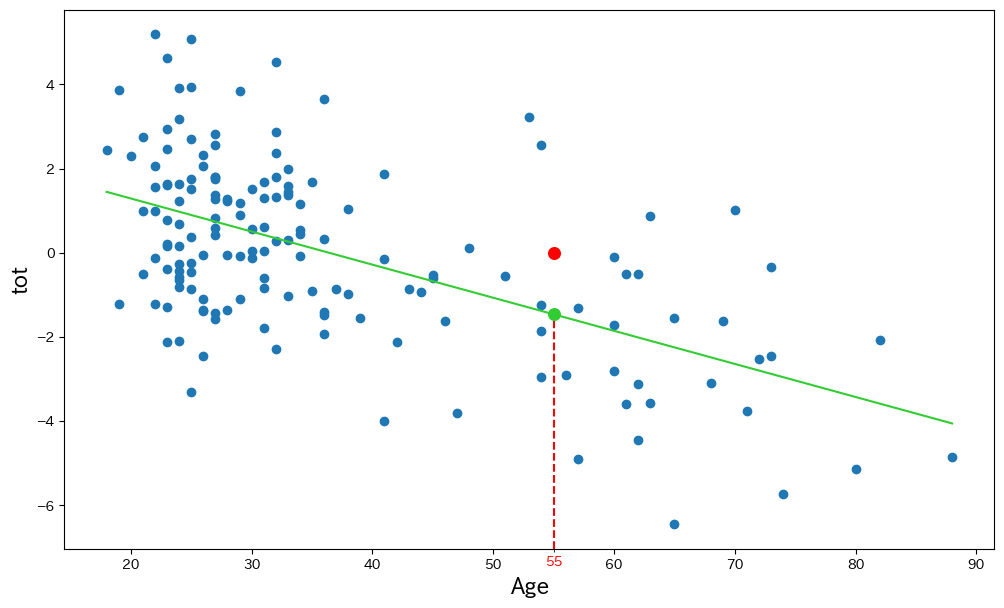

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(kidney.age, kidney.tot)
ax.plot(kidney.age, yhat, c="limegreen")

ax.scatter(subj55.age, subj55.tot, s=70, c="r")

ymin, ymax = ax.get_ybound()
ax.axvline(55, ymin=0, ymax=(yhat55 - ymin)/(ymax - ymin), c="r", linestyle="--", zorder=-1)
ax.scatter([55], [yhat55], s=70, c="limegreen")
ax.set_xticks([55], minor=True)
ax.set_xticklabels(["55"], minor=True, color="r")

ax.set_xlabel("Age", size=16)
ax.set_ylabel("tot", size=16);

# 8.1

## 図8.2

In [ ]:
x = range(1, 12)
y = [0, 0, 0, 3, 6, 6, 5, 9, 9, 10, 10]
p = [0 if i/10 <= 0.5 else 1 for i in y]
p_=[i/10 for i in y]

In [ ]:
a = pd.DataFrame({'x':x})
a['y']=y
a['p']=p_
print(a.to_string(index=False))

 x  y   p
 1  0 0.0
 2  0 0.0
 3  0 0.0
 4  3 0.3
 5  6 0.6
 6  6 0.6
 7  5 0.5
 8  9 0.9
 9  9 0.9
10 10 1.0
11 10 1.0


Text(0, 0.5, '死亡率')

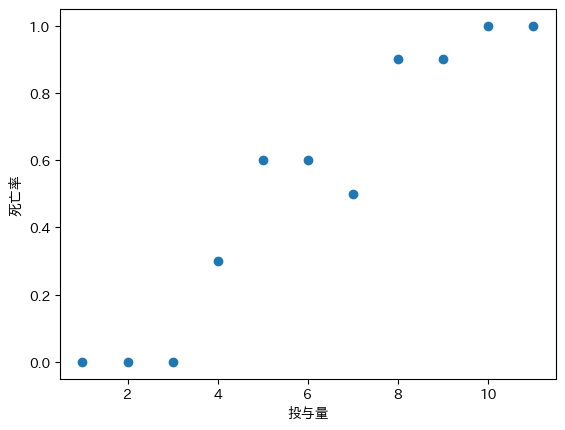

In [ ]:
plt.scatter(x,p_)
plt.xlabel('投与量')
plt.ylabel('死亡率')

In [ ]:
from sklearn.linear_model import LogisticRegression

# モデルのインスタンス化
model = LogisticRegression()

# データをフィットさせる
X = [[i] for i in x]  # データを2D配列に変換
model.fit(X, p)

LogisticRegression()

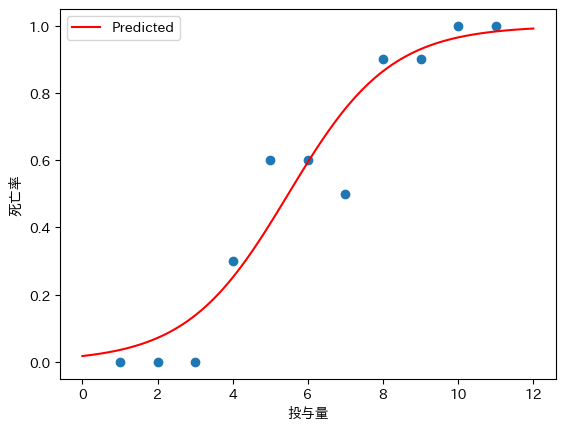

In [ ]:
new_x = np.linspace(0, 12, 100)  # 0から12の範囲を100等分したデータを生成
new_X = np.array([[i] for i in new_x])
predicted_probabilities = model.predict_proba(new_X)  # クラスの所属確率を取得
predicted_p = predicted_probabilities[:, 1]  # 死亡率が1となる確率を取得

y=[0,0,0,3,6,6,5,9,9,10,10]
p_=[i/10 for i in y]
plt.scatter(x,p_)
plt.xlabel('投与量')
plt.ylabel('死亡率')
plt.plot(new_x, predicted_p, color='r', label='Predicted')  # 予測結果のプロット
plt.legend()  # 凡例の表示
plt.show()  # グラフの表示

In [ ]:
# 推定されたパラメータ
beta0 = model.intercept_[0]
beta1 = model.coef_[0]

print("beta0:", beta0)
print("beta1:", beta1)

beta0: -4.042848398311045
beta1: [0.73743037]


In [ ]:
def pihat(x):
  return (1+np.exp(-(beta0+beta1*x)))**(-1)

In [ ]:
def sd_pi(x):
  return (pihat(x)*(1-pihat(x))/10)**(1/2)

In [ ]:
sd = [sd_pi(i) for i in x]

In [ ]:
pd.DataFrame(sd).T

,0,1,2,3,4,5,6,7,8,9,10
0,0.058424,0.081335,0.109124,0.137118,0.155646,0.155277,0.136224,0.108096,0.08043,0.057721,0.040653


In [ ]:
pihat(1)

0.03538578602641578

In [ ]:
(pihat(1)*(1-pihat(1))/10)**(1/2)

0.05842399521918071

In [ ]:
(p_[0]*(1-p_[0])/10)**(1/2)

0.0

# 8.4

## 表8.5

In [ ]:
df = pd.read_csv("/content/table8_5.csv", index_col =0)

In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,,,,,,,,,,,,,,,
18,1,6,6,3,1,4,6,8,8,20,10,7,16,9,4
17,3,2,3,4,0,5,7,6,6,7,5,7,6,8,5
16,3,2,3,3,3,2,9,9,6,3,5,4,5,2,1
15,1,1,4,3,4,3,2,3,8,9,4,3,4,1,1
14,1,3,2,3,3,4,5,7,6,7,3,4,0,0,1
13,3,2,4,5,3,6,4,3,2,2,5,1,0,0,0
12,2,0,2,4,5,4,2,3,3,0,1,2,0,0,1
11,4,1,1,4,7,3,3,1,2,0,1,1,0,0,0
10,1,0,0,2,2,2,1,2,0,0,0,1,2,0,0


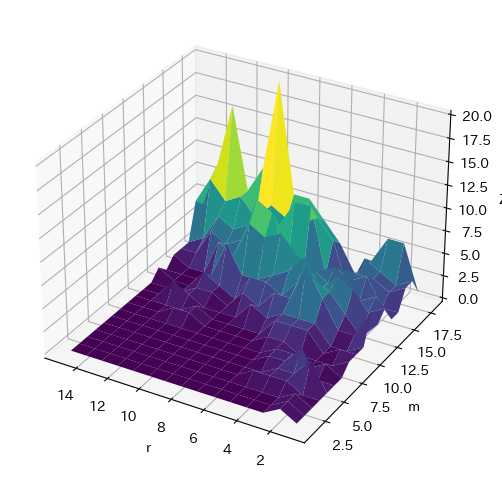

In [ ]:
#r values are from 1 to 16
m = np.arange(18, 0, -1)  # m values are from 18 to 1
r = np.arange(1,16)
M, R = np.meshgrid(r,m)

# Convert the data to a 2D numpy array
Z = np.array(df)[:, :]

# Create the plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, R, Z, cmap='viridis')

# Add labels
ax.set_xlabel('r')
ax.set_ylabel('m')
ax.set_zlabel('Z')
ax.invert_xaxis()

# Show the plot
plt.show()

In [ ]:
import plotly.graph_objects as go

# Create the surface and scatter plot
surface = go.Surface(x=M, y=R, z=Y_pred, colorscale='Viridis', opacity=0.6)
#scatter = go.Scatter3d(x=M.flatten(), y=R.flatten(), z=Z.flatten(), mode='markers', marker=dict(size=4, color='red'))

# Create the layout
layout = go.Layout(scene=dict(xaxis_title='r',
                              yaxis_title='m',
                              zaxis_title='Z'))

# Create the figure and add the plots
fig = go.Figure(data=[surface], layout=layout)

# Show the plot
fig.show()


In [ ]:
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# r values are from 1 to 16
m = np.arange(18, 0, -1)  # m values are from 18 to 1
r = np.arange(1,16)
M, R = np.meshgrid(r,m)

# Convert the data to a 2D numpy array
Z = np.array(df)[:, :]

# Prepare the data for GLM
x1, x2 = np.meshgrid(r, m)
x1 = x1.flatten()  # r
x2 = x2.flatten()  # m
x3 = np.square(x1)  # r squared
x4 = np.multiply(x1, x2)  # r times m
x5 = np.square(x2)  # m squared

# Combine the variables into a single 2D array
X = sm.add_constant(np.column_stack((x1, x2, x3, x4, x5)))

y = Z.flatten()

# Fit the GLM model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# Print the results
print(poisson_results.summary())

# Get the predicted values
y_pred = poisson_results.predict(X)

# Reshape the predicted values to have the same shape as Z
Y_pred = np.reshape(y_pred, Z.shape)

# Create the plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, R, Y_pred, cmap='viridis', alpha=0.6)


# Add labels
ax.set_xlabel('r')
ax.set_ylabel('m')
ax.set_zlabel('Z')



# Invert the r axis
ax.invert_xaxis()

# Show the plot
plt.show()


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  270
Model:                            GLM   Df Residuals:                      264
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -309.68
Date:                Fri, 16 Jun 2023   Deviance:                       216.34
Time:                        01:17:18   Pearson chi2:                     223.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9225
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8715      0.531     -3.523      0.0

<IPython.core.display.Javascript object>

In [ ]:
X

array([[  1.,   1.,  18.,   1.,  18., 324.],
       [  1.,   2.,  18.,   4.,  36., 324.],
       [  1.,   3.,  18.,   9.,  54., 324.],
       ...,
       [  1.,  13.,   1., 169.,  13.,   1.],
       [  1.,  14.,   1., 196.,  14.,   1.],
       [  1.,  15.,   1., 225.,  15.,   1.]])

In [ ]:
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# r values are from 1 to 16
m = np.arange(18, 0, -1)  # m values are from 18 to 1
r = np.arange(1,16)
M, R = np.meshgrid(r,m)

# Convert the data to a 2D numpy array
Z = np.array(df)[:, :]

# Prepare the data for GLM
x1, x2 = np.meshgrid(r, m)
x1 = x1.flatten()  # r
x2 = x2.flatten()  # m
x3 = np.square(x1)  # r squared
x4 = np.multiply(x1, x2)  # r times m
x5 = np.square(x2)  # m squared
x6 = np.multiply(x1, x4)  # r times m**2
x7 = np.multiply(x3, x2)  # r**2 times m
x8 = np.multiply(x3, x5)  # r**2 times m**2

# Combine the variables into a single 2D array
X = sm.add_constant(np.column_stack((x1, x2, x3, x4, x5,x6,x7,x8)))

y = Z.flatten()

# Fit the GLM model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# Print the results
print(poisson_results.summary())

# Get the predicted values
y_pred = poisson_results.predict(X)

# Reshape the predicted values to have the same shape as Z
Y_pred = np.reshape(y_pred, Z.shape)

# Create the plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, R, Y_pred, cmap='viridis', alpha=0.6)


# Add labels
ax.set_xlabel('r')
ax.set_ylabel('m')
ax.set_zlabel('Z')

# Invert the r axis
ax.invert_xaxis()

# Show the plot
plt.show()


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  270
Model:                            GLM   Df Residuals:                      262
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -307.41
Date:                Fri, 16 Jun 2023   Deviance:                       211.79
Time:                        01:17:30   Pearson chi2:                     245.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.9238
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6271      0.775     -3.390      0.0

<IPython.core.display.Javascript object>

In [ ]:
import plotly.graph_objects as go

# Create the surface and scatter plot
surface = go.Surface(x=M, y=R, z=Y_pred, colorscale='Viridis', opacity=0.6)
#scatter = go.Scatter3d(x=M.flatten(), y=R.flatten(), z=Z.flatten(), mode='markers', marker=dict(size=4, color='red'))

# Create the layout
layout = go.Layout(scene=dict(xaxis_title='r',
                              yaxis_title='m',
                              zaxis_title='Z'))

# Create the figure and add the plots
fig = go.Figure(data=[surface], layout=layout)

# Show the plot
fig.show()